In [1]:
import pandas as pd 
import glob
#import quandl
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sym = [f.split("/")[1].split('.')[0] for f in glob.glob("portfolio/*")]
print(sym)

['HDFC', 'BHARTIARTL', 'MARUTI', 'YESBANK', 'ADANIPORTS', 'BAJFINANCE', 'AXISBANK', 'HEROMOTOCO', 'INFY', 'COALINDIA', 'CIPLA', 'BPCL', 'HDFCBANK', 'M&M', 'ASIANPAINT']


In [3]:
data = pd.read_csv("portfolio/HDFC.NS.csv")
data['Date'] =  pd.to_datetime(data['Date'], format='%Y/%m/%d')
data.index = data["Date"]


In [4]:
data = data.drop(data.columns,axis=1)

In [5]:
data.columns


Index([], dtype='object')

In [6]:
for s in sym:
    y = pd.read_csv("portfolio/"+s+".NS.csv")
    y['Date'] =  pd.to_datetime(y['Date'], format='%Y/%m/%d')
    y.index = y["Date"]
    y = y[['Adj Close']]

    y= y.rename({'Adj Close':s},axis=1)
    #print(y.head())
    data = data.join(y)
print(data.tail())
    

                   HDFC  BHARTIARTL       MARUTI     YESBANK  ADANIPORTS  \
Date                                                                       
2018-12-26  1933.349976  320.450012  7569.100098  179.449997  376.549988   
2018-12-27  1948.849976  316.700012  7499.950195  178.100006  384.000000   
2018-12-28  1979.949951  316.549988  7505.549805  181.449997  387.399994   
2018-12-31  1968.349976  312.500000  7465.500000  181.800003  387.700012   
2019-01-01  2009.000000  319.500000  7476.799805  184.250000  389.000000   

             BAJFINANCE    AXISBANK   HEROMOTOCO        INFY   COALINDIA  \
Date                                                                       
2018-12-26  2567.399902  619.500000  3175.199951  644.049988  239.891281   
2018-12-27  2587.149902  617.549988  3128.800049  656.799988  242.949997   
2018-12-28  2634.800049  625.049988  3122.600098  656.950012  242.300003   
2018-12-31  2645.149902  619.900024  3104.250000  658.950012  240.750000   
2019-01-01 

In [7]:
data = data.dropna()
print(data.head())

                  HDFC  BHARTIARTL       MARUTI    YESBANK  ADANIPORTS  \
Date                                                                     
2010-11-04  664.846436  309.586395  1414.844727  50.441006  154.588760   
2010-11-08  652.712585  311.389923  1397.013428  50.373238  154.780548   
2010-11-09  652.038330  317.559845  1381.388062  49.925896  155.595688   
2010-11-10  651.948547  310.440674  1384.344238  49.993679  153.342072   
2010-11-11  640.039429  300.663788  1379.933472  48.319530  149.026611   

            BAJFINANCE    AXISBANK   HEROMOTOCO        INFY   COALINDIA  \
Date                                                                      
2010-11-04   43.313114  230.810257  1441.514404  170.509933  211.943192   
2010-11-08   43.251659  232.528931  1432.703613  167.115646  204.642288   
2010-11-09   43.607117  233.485443  1431.058838  169.548462  201.734283   
2010-11-10   43.291767  230.660797  1417.510010  170.814514  199.723434   
2010-11-11   42.543369  227.522

In [8]:
data_returns = data.pct_change()

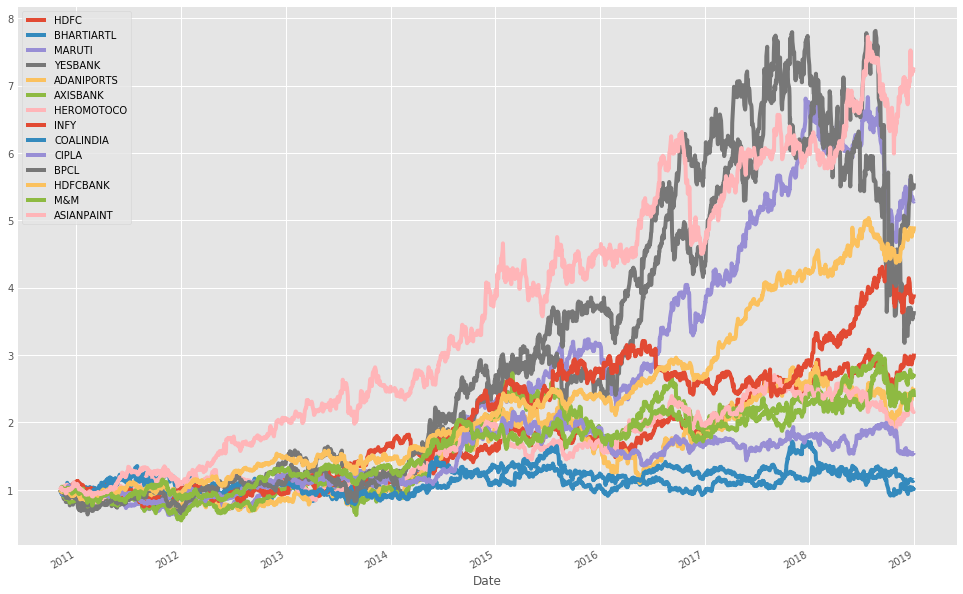

In [25]:

plt.style.use('ggplot')
normalized_prices.drop('BAJFINANCE',axis=1).plot(figsize=(15,11))

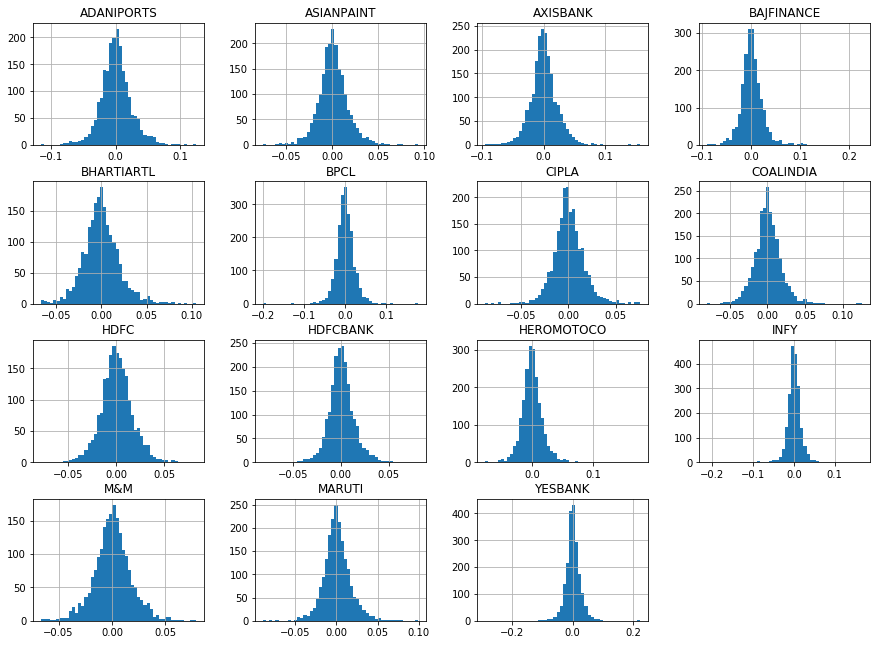

In [9]:
data_returns.hist(bins=50,figsize=(15,11));

In [11]:

def get_risk(prices):
    return (prices / prices.shift(1) - 1).dropna().std().values

def get_return(prices):
    return ((prices / prices.shift(1) - 1).dropna().mean() * np.sqrt(250)).values

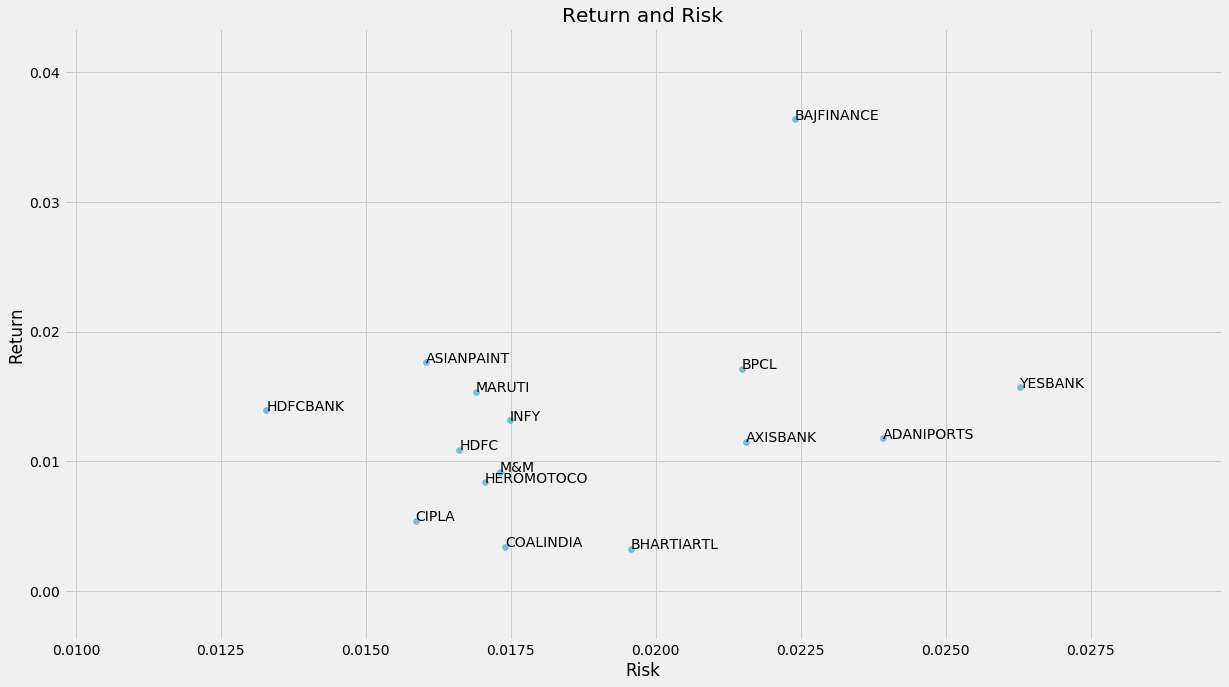

In [12]:

plt.style.use('fivethirtyeight')
risk_v = get_risk(data)
return_v = get_return(data)


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(x=risk_v, y=return_v, alpha=0.5)
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')
for i, symbol in enumerate(sym):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
plt.show()

In [13]:
def random_weights(n):
    weights = np.random.rand(n)
    return weights / sum(weights)


def get_portfolio_risk(weights, normalized_prices):
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=normalized_prices.index, data={'portfolio': portfolio_val})
    return (portfolio / portfolio.shift(1) - 1).dropna().std().values[0]


def get_portfolio_return(weights, normalized_prices):
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=normalized_prices.index, data={'portfolio': portfolio_val})
    ret = get_return(portfolio)
    return ret[0]

In [22]:
risk_all = np.array([])
return_all = np.array([])

np.random.seed(0)
normalized_prices = data / data.iloc[0, :]


for _ in range(0, 5000):
    weights = random_weights(len(sym))
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=data.index, data={'portfolio': portfolio_val})
    risk = get_risk(portfolio)
    ret = get_return(portfolio)
    risk_all = np.append(risk_all, risk)
    return_all = np.append(return_all, ret)
    p = get_portfolio_risk(weights=weights, normalized_prices=normalized_prices)
    


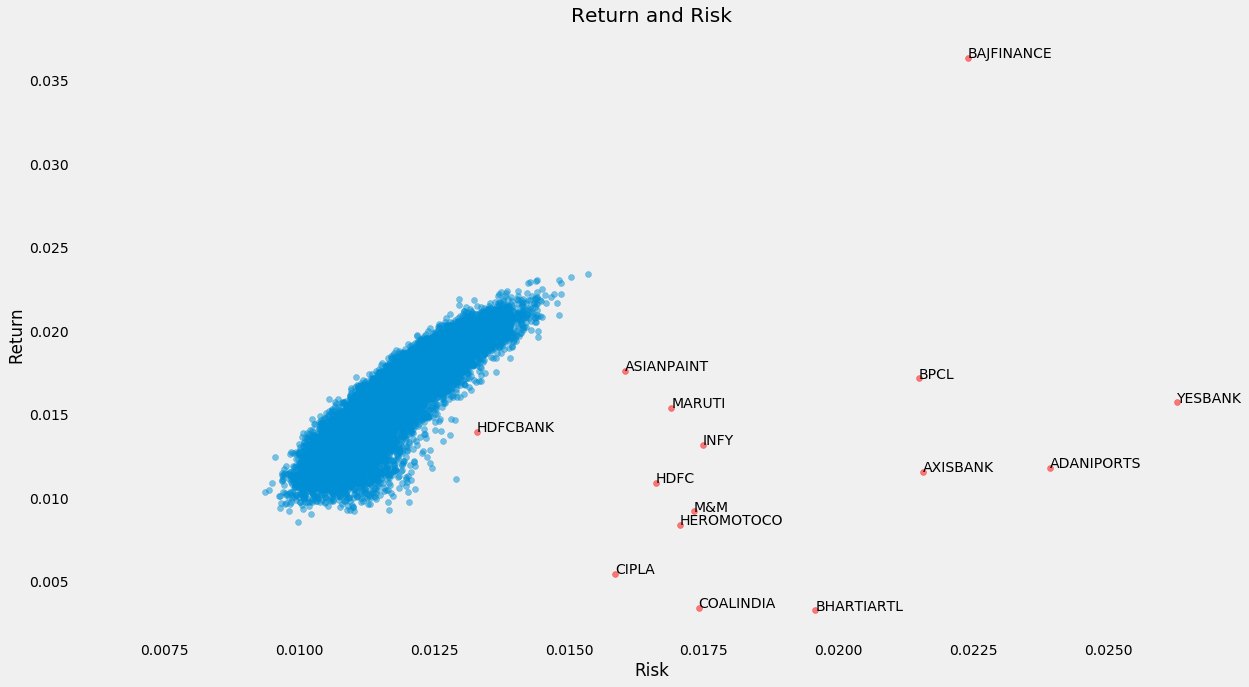

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(x=risk_all, y=return_all, alpha=0.5)
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')

for i, symbol in enumerate(sym):
    ax.annotate(symbol, (risk_v[i], return_v[i]))

ax.scatter(x=risk_v, y=return_v, alpha=0.5, color='red')
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')
ax.grid()
plt.show()

### Optimization (SCIPY)

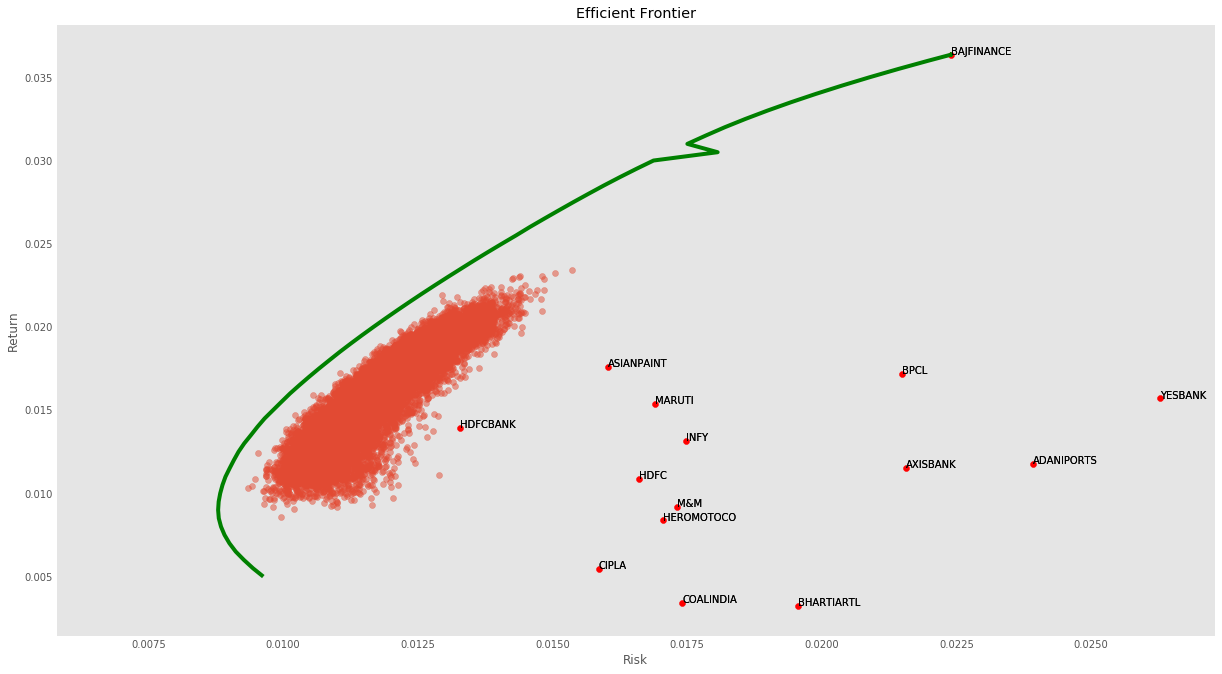

In [30]:
def optimize(prices, symbols, target_return=0.1):
    normalized_prices = prices / prices.ix[0, :]
    init_guess = np.ones(len(symbols)) * (1.0 / len(symbols))
    bounds = ((0.0, 1.0),) * len(symbols)
    weights = minimize(get_portfolio_risk, init_guess,
                       args=(normalized_prices,), method='SLSQP',
                       options={'disp': False},
                       constraints=({'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)},
                                    {'type': 'eq', 'args': (normalized_prices,),
                                     'fun': lambda inputs, normalized_prices:
                                     target_return - get_portfolio_return(weights=inputs,
                                                                          normalized_prices=normalized_prices)}),
                       bounds=bounds)
    return weights.x
optimal_risk_all = np.array([])
optimal_return_all = np.array([])
for target_return in np.arange(0.005, .0402, .0005):
    opt_w = optimize(prices=data, symbols=sym, target_return=target_return)
    optimal_risk_all = np.append(optimal_risk_all, get_portfolio_risk(opt_w, normalized_prices))
    optimal_return_all = np.append(optimal_return_all, get_portfolio_return(opt_w, normalized_prices))
# plotting


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# random portfolio risk return
ax.scatter(x=risk_all, y=return_all, alpha=0.5)
# optimal portfolio risk return
for i, symbol in enumerate(sym):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
ax.plot(optimal_risk_all, optimal_return_all, '-', color='green')
# symbol risk return
for i, symbol in enumerate(sym):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
ax.scatter(x=risk_v, y=return_v, color='red')
ax.set(title='Efficient Frontier', xlabel='Risk', ylabel='Return')
ax.grid()
plt.savefig('return_risk_efficient_frontier.png', bbox_inches='tight')